### [これ](https://networkx.github.io/documentation/stable/tutorial.html)の追試

In [1]:
import networkx as nx
# nx.test()
nx.__version__

'2.3'

#### Creating a graph

In [2]:
G = nx.Graph()
# this graph's nodes can be any hashable object
# such as stringm img, XML object...

In [3]:
G

Nodes

In [4]:
G.add_node(1)
# G can be grown
# I feed a node in here

In [5]:
G.nodes, G.edges

(NodeView((1,)), EdgeView([]))

In [6]:
G.add_nodes_from([2, 3])
# can add a lists of nodes
G.nodes, G.edges

(NodeView((1, 2, 3)), EdgeView([]))

In [7]:
# create new graph H
H = nx.path_graph(10)
#Returns the Path graph `P_n` of linearly connected nodes.
H.nodes, H.edges

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9)),
 EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]))

In [8]:
#You can also add nodes along with node attributes if your container yields 2-tuples (node, node_attribute_dict).
G.add_nodes_from(H)
G.nodes, G.edges
# node from H !
# caution! no edge are imported

(NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9)), EdgeView([]))

In [9]:
G.add_node(H) # これでHをノードとして保持することになる
G.nodes, G.edges

(NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x10e4ee898>)),
 EdgeView([]))

#### Edges

In [10]:
G.add_edge(1, 2) #connect 1 and 2
G.nodes, G.edges

(NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x10e4ee898>)),
 EdgeView([(1, 2)]))

In [11]:
e=(2,3)
G.add_edge(*e) #dont forget unpack edge tuple
G.nodes, G.edges

(NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x10e4ee898>)),
 EdgeView([(1, 2), (2, 3)]))

In [12]:
G.add_edges_from([(1, 2), (1, 3)]) # add a list of edges
G.nodes, G.edges

(NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x10e4ee898>)),
 EdgeView([(1, 2), (1, 3), (2, 3)]))

In [13]:
G.add_edges_from(H.edges)
# import edges from H
G.nodes, G.edges

(NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x10e4ee898>)),
 EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]))

#### delete

In [14]:
G.clear()
G.nodes, G.edges

(NodeView(()), EdgeView([]))

practice on adding nodes and edges

In [15]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

G.nodes, G.edges

(NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm')),
 EdgeView([(1, 2), (1, 3), (3, 'm')]))

In [16]:
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


#### other views

In [17]:
G.adj #馴染みが深い

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}})

In [18]:
G.degree #隣接しているノードの数

DegreeView({1: 2, 2: 1, 3: 2, 'spam': 0, 's': 0, 'p': 0, 'a': 0, 'm': 1})

In [19]:
# can specify from subset
print(repr(G.edges([2, 'm'])))
print(repr(G.degree([2, 3])))

EdgeDataView([(2, 1), ('m', 3)])
DegreeView({2: 1, 3: 2})


#### remove

In [20]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 3)
print(list(G.edges))

[1, 3, 'spam']
[]


#### create graph from graph

In [21]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist) #create new graph H
print(list(H.edges()), H.nodes)

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)] [0, 1, 2, 3]


#### Accessing edges and neighbors

In [22]:
G[1] # same as G.adj[1]

AtlasView({2: {}})

In [23]:
G[1] == G.adj[1]

True

In [24]:
G[1][2] # access to edge
# same as G.edges[1,2]

{}

In [25]:
# try set attributes of an edge
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(G.edges[1,3],G.edges[1,2])

{'color': 'blue'} {'color': 'red'}


In [26]:
FG = nx.Graph() # create new graph
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
# (node,node,weight)
for n, nbrs in FG.adj.items():
    # n is node number
    # nbrs is neighbours dict(node number and attribute)
    print(n,nbrs)
    for nbr, eattr in nbrs.items():
        # nbr is node number
        # eattr is edge attributes
        print(nbr, eattr)
        wt = eattr['weight']
        if wt < 0.5:
            print('(%d, %d, %.3f)' % (n, nbr, wt))

    print()

1 {2: {'weight': 0.125}, 3: {'weight': 0.75}}
2 {'weight': 0.125}
(1, 2, 0.125)
3 {'weight': 0.75}

2 {1: {'weight': 0.125}, 4: {'weight': 1.2}}
1 {'weight': 0.125}
(2, 1, 0.125)
4 {'weight': 1.2}

3 {1: {'weight': 0.75}, 4: {'weight': 0.375}}
1 {'weight': 0.75}
4 {'weight': 0.375}
(3, 4, 0.375)

4 {2: {'weight': 1.2}, 3: {'weight': 0.375}}
2 {'weight': 1.2}
3 {'weight': 0.375}
(4, 3, 0.375)



In [27]:
list(FG.adj.items())

[(1, AtlasView({2: {'weight': 0.125}, 3: {'weight': 0.75}})),
 (2, AtlasView({1: {'weight': 0.125}, 4: {'weight': 1.2}})),
 (3, AtlasView({1: {'weight': 0.75}, 4: {'weight': 0.375}})),
 (4, AtlasView({2: {'weight': 1.2}, 3: {'weight': 0.375}}))]

In [28]:
# Convenient access to all edges
# you can write as follows
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


#### Assign attributes

In [29]:
# example of graph attributes
G = nx.Graph(day="Friday")
print(G.graph) #show graph attr
G.graph['day'] = "Monday"
print(G.graph) #udpated!

{'day': 'Friday'}
{'day': 'Monday'}


In [30]:
# example of node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])

G.nodes[1]['room'] = 714
print(G.nodes.data())

{'time': '5pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


In [31]:
# example of edge attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

#### Direct graphs

In [32]:
DG = nx.DiGraph() # create directed graph
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

print(DG.out_degree(1, weight='weight')) #1からの流出量
# weight = 'weight' is what!?

print(DG.in_degree(1, weight='weight')) #1への流入量

print(DG.degree(1, weight='weight')) #2の総合の重さ

print(list(DG.successors(1)))
# successors means 後継者 つまり次のノードを指す

print(list(DG.neighbors(1)))
# writting neightbors but this 'neighbors' is same as successors

0.5
0.75
1.25
[2]
[2]


In [33]:
H = nx.Graph(G)  # convert G to undirected graph
H.adj

AdjacencyView({1: {2: {'weight': 4.7, 'color': 'blue'}}, 3: {4: {'color': 'red', 'weight': 4.2}, 2: {'weight': 8}}, 2: {1: {'weight': 4.7, 'color': 'blue'}, 3: {'weight': 8}}, 4: {3: {'color': 'red', 'weight': 4.2}, 5: {'color': 'red'}}, 5: {4: {'color': 'red'}}})

In [34]:
G.adj

AdjacencyView({1: {2: {'weight': 4.7, 'color': 'blue'}}, 3: {4: {'color': 'red', 'weight': 4.2}, 2: {'weight': 8}}, 2: {1: {'weight': 4.7, 'color': 'blue'}, 3: {'weight': 8}}, 4: {3: {'color': 'red', 'weight': 4.2}, 5: {'color': 'red'}}, 5: {4: {'color': 'red'}}})

#### Multigraphs
ノードとノード間に複数のエッヂがあるようなグラフをマルチグラフと言うらしい

In [35]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(dict(MG.degree(weight='weight')))

GG = nx.Graph() #normal graph
# assign minimum weight edge to GG from MG
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)


print(nx.shortest_path(GG, 1, 3))

{1: 1.25, 2: 1.75, 3: 0.5}
[1, 2, 3]


In [36]:
nx.shortest_path(MG,1,3)
#what!?  I can use this function on MultiGraph!!

[1, 2, 3]

#### Analyzing graphs

In [37]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print(list(nx.connected_components(G)))

print(sorted(d for n, d in G.degree()))

print(nx.clustering(G)) #maybe useful

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]
{1: 0, 2: 0, 3: 0, 'spam': 0}


#### Drawing graphs

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


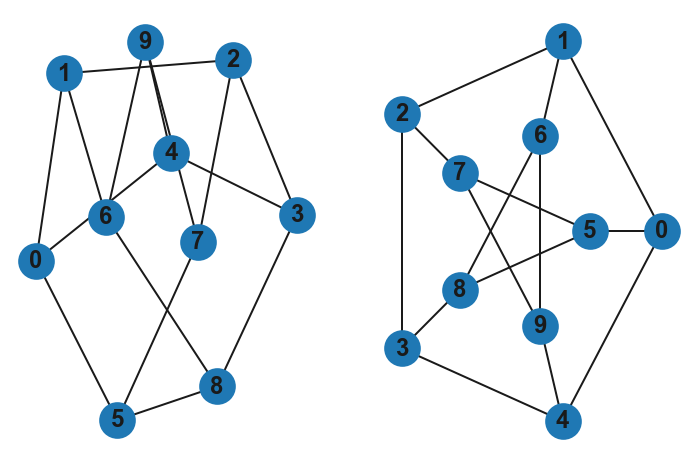

In [39]:
G = nx.petersen_graph() #sample structure
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold') # show graphs
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
#Draw networkx graph with shell layout.とは？

/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was depreca

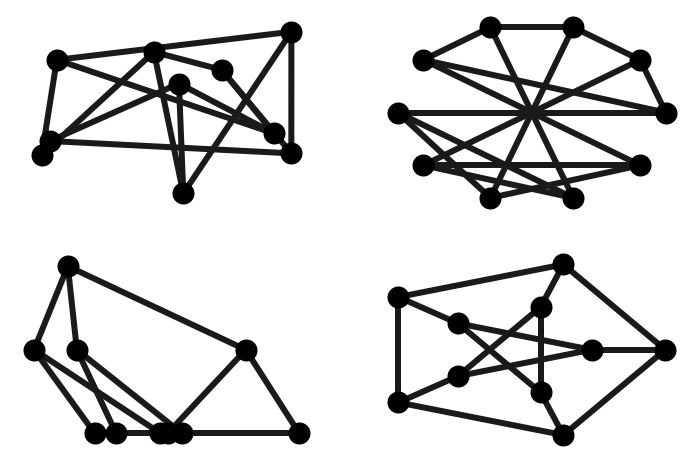

In [40]:
# specify options
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options) #plot randomly

plt.subplot(222)
nx.draw_circular(G, **options) #nodes make a circul

plt.subplot(223)
nx.draw_spectral(G, **options) #??

plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options) #can specify hierarchical layout

/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


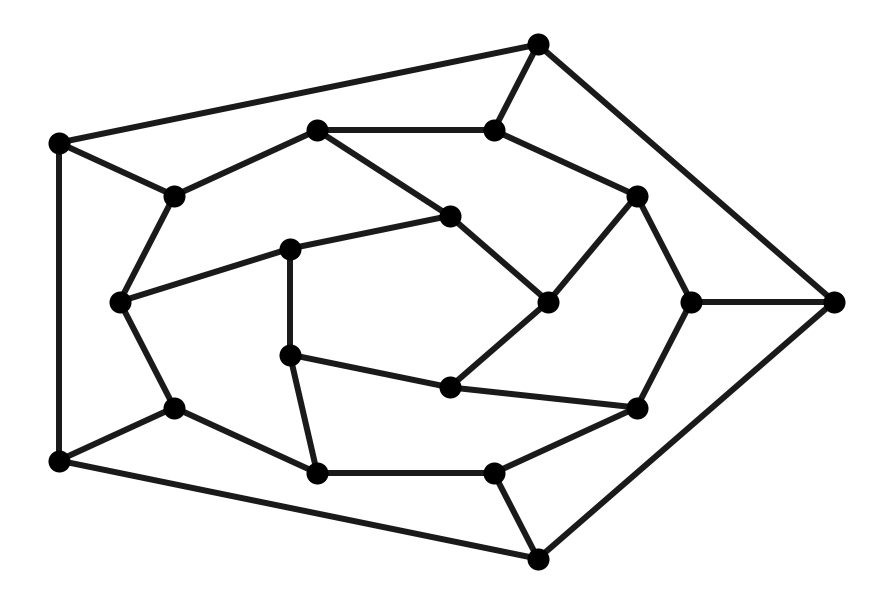

In [41]:
G = nx.dodecahedral_graph() #sample graph
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


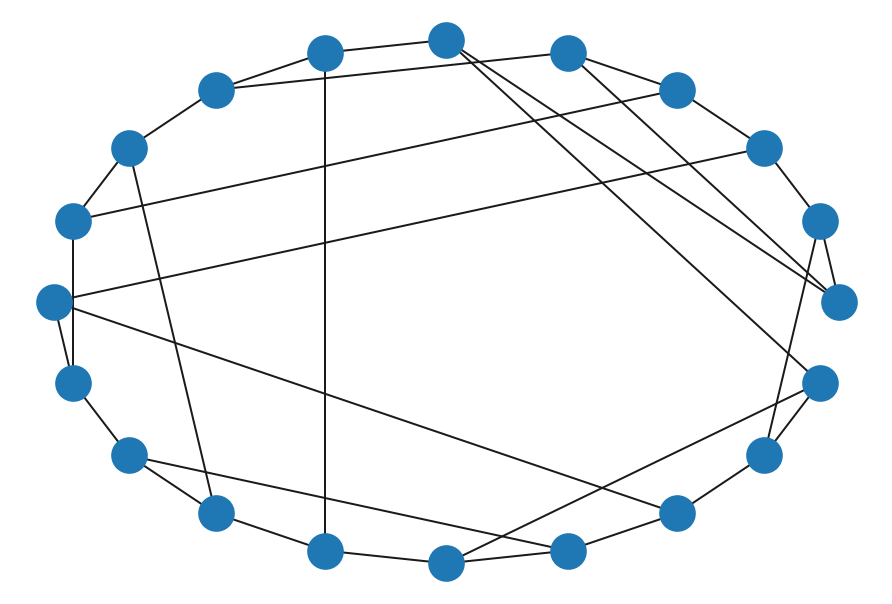

In [42]:
from networkx.drawing.nx_pydot import write_dot
#選択肢 circo, dot, fdp, neato, nop, nop1, nop2, osage, patchwork, sfdp, twopi
pos = nx.nx_agraph.graphviz_layout(G,prog='circo')
nx.draw(G, pos=pos)

/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


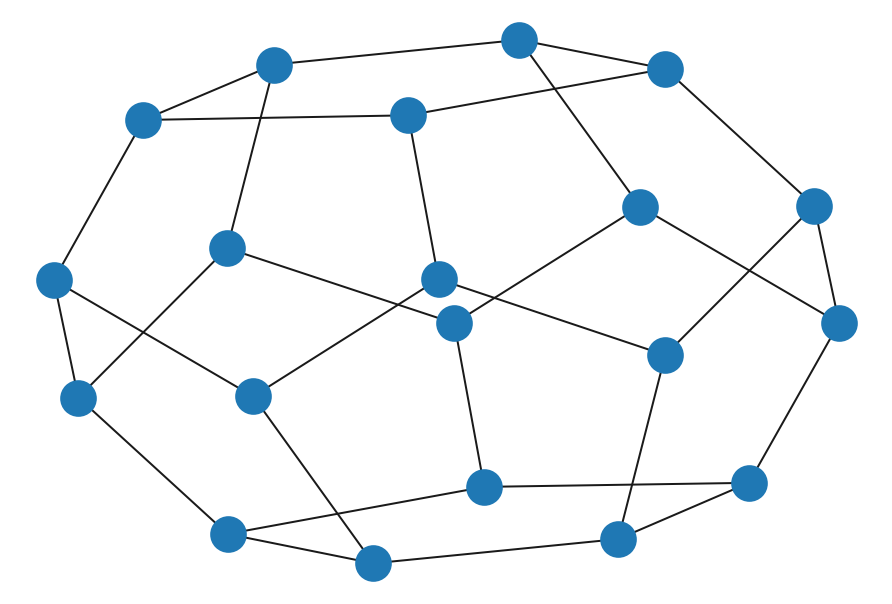

In [43]:
from networkx.drawing.nx_pydot import write_dot
#選択肢 circo, dot, fdp, neato, nop, nop1, nop2, osage, patchwork, sfdp, twopi
pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
nx.draw(G, pos=pos)

/Users/masaki/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


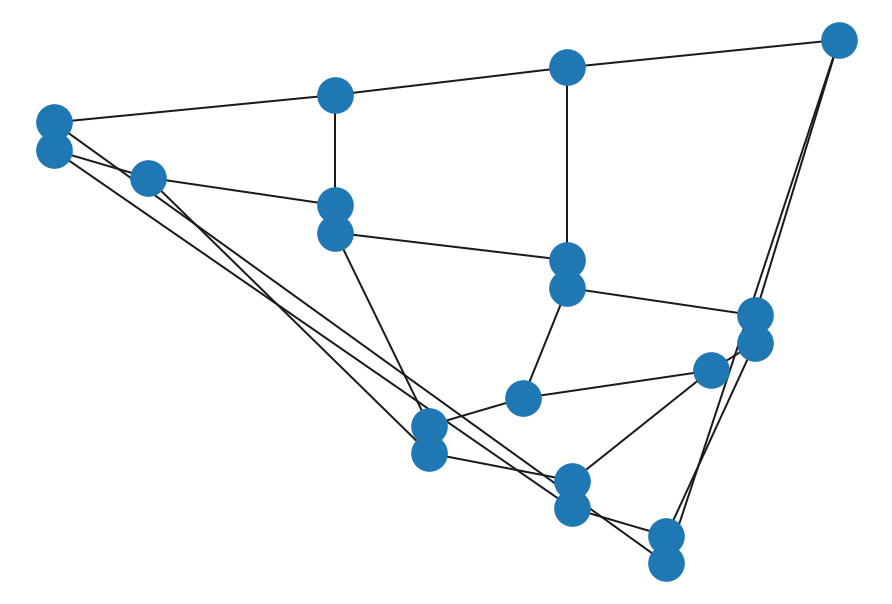

In [44]:
from networkx.drawing.nx_pydot import write_dot
#選択肢neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
pos = nx.nx_agraph.graphviz_layout(G,prog='dot')
nx.draw(G, pos=pos)